## Normal-normal model

\begin{aligned}
x_1 \ldots x_n|\mu &\sim N(\mu, 1) 
\\
\mu &\propto 1
\\
\mu|x_1 \ldots x_n &\sim N(\bar{x}, 1/n)
\end{aligned}

In [1]:
source("metropolis_hastings.R")
source("hmc.R")
source("utility.R")

In [2]:
set.seed(1)
source("normal-normal.R")

n <- 100
S <- 5000
x <- rnorm(n, 0, 1)

nn_mh <- metropolis_hastings(param_init = 3, 
                             likelihood = nn_likelihood(x),
                             prior = nn_prior(),
                             proposal = nn_proposal(sigma_mean = .5),
                             prop_density = nn_prop_density(sigma_mean = .5, lambda_rate = 1),
                             iters = S)

nn_hmc <- hmc(param_init = 3, 
                  U = nn_U(x), 
                  dU = nn_dU(x), 
                  e = 0.001, 
                  L = 50, 
                  iters = S)

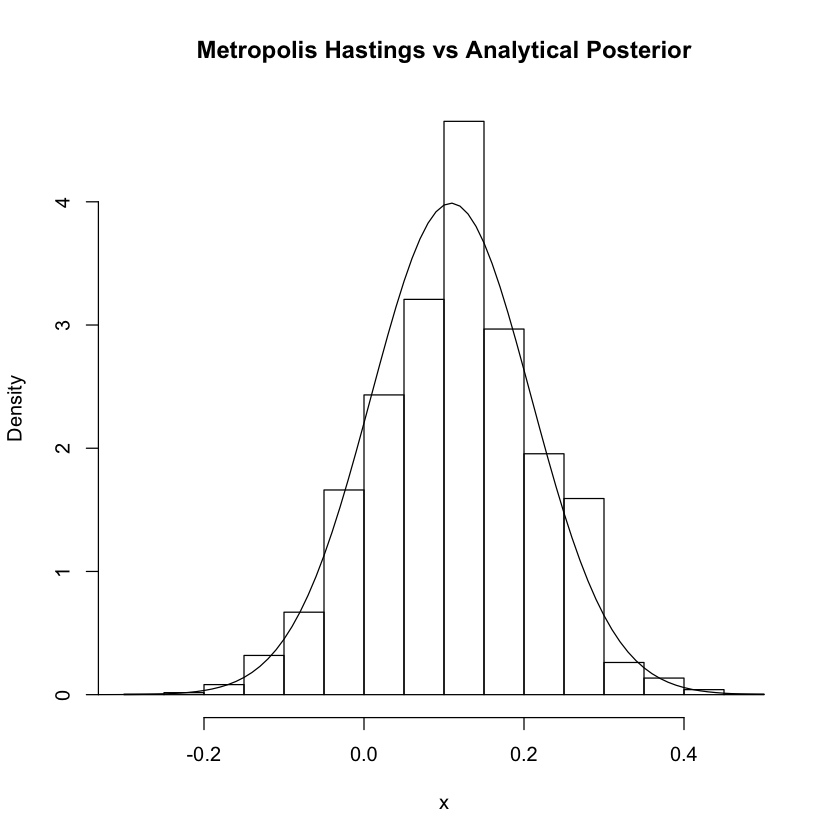

In [4]:
hist(nn_mh$samples[[1]][101:S, ], probability = TRUE, 
     main = "Metropolis Hastings vs Analytical Posterior", xlab = "x", breaks = 25)
plot_grid <- seq(-.5, .5, .01)
lines(plot_grid, dnorm(plot_grid, mean(x), sqrt(1 / n)))

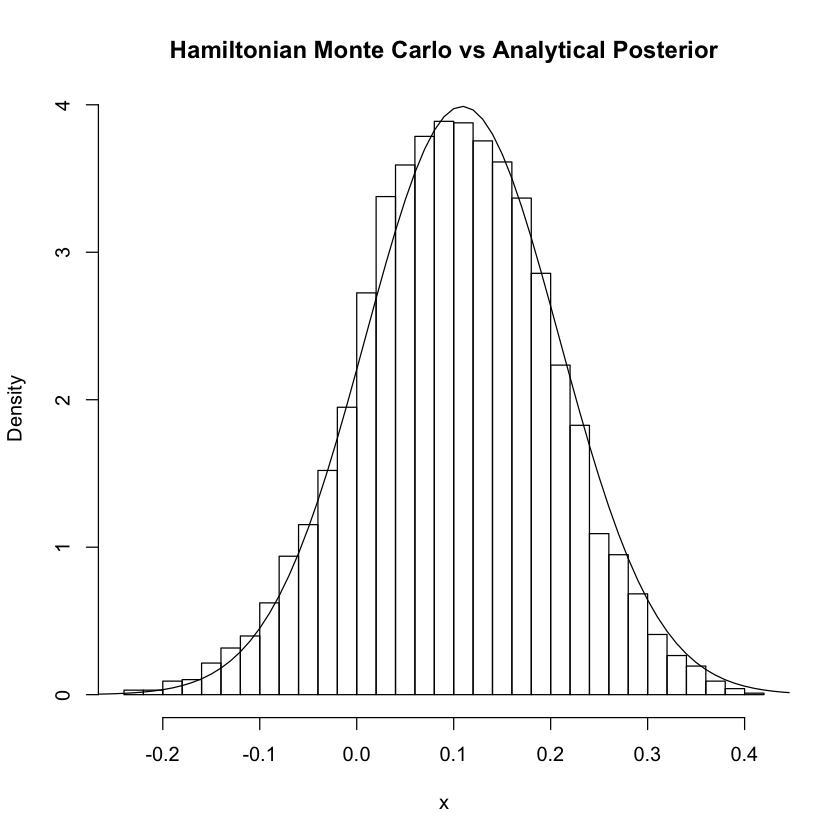

In [5]:
hist(nn_hmc$samples[101:S,], probability = TRUE, 
     main = "Hamiltonian Monte Carlo vs Analytical Posterior", xlab = "x", breaks = 25)
plot_grid <- seq(-.5, .5, .01)
lines(plot_grid, dnorm(plot_grid, mean(x), sqrt(1 / n)))

In [7]:
sd(nn_mh$samples[[1]][101:S], na.rm = TRUE)
sd(nn_hmc$samples[101:S], na.rm = TRUE)

[1] 0.1008659

[1] 0.09851796

In [9]:
nn_mh$accept_rate
nn_hmc$accepts

[1] 0.2444

[1] 4999